# Task 1: XOR

In [2]:
# Import modules
from __future__ import print_function
import tensorflow as tf
import numpy as np
from numpy.random import shuffle
import time
import matplotlib.pyplot as plt

# Plot configurations
% matplotlib inline

# Notebook auto reloads code. (Ref: http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython)
% load_ext autoreload
% autoreload 2

## Task 1, Part 1: Backpropagation through time (BPTT)

**Question:** Consider a simple RNN network shown in the following figure, where __ _wi, wh, b, a, c_ __ are the scalar parameters of the network. The loss function is the **mean squared error (MSE)**. Given input (x0, x1) = (1, 0), ground truth (g1, g2) = (1, 1), h0 = 0, (wi, wh, b, a, c) = (1, 1, 1, 1, 1), compute __ _(dwi, dwh, db, da, dc)_ __, which are the gradients of loss with repect to 5 parameters __ _(wi, wh, b, a, c)_ __.

![bptt](./img/bptt.png)

In [54]:
def sigmoid(x):
    return (1 / (1 + np.exp(-x)))

In [65]:
(x0, x1) = (1, 0)
(g1, g2) = (1, 1)
h0 = 0
(wi, wh, b, a, c) = (1, 1, 1, 1, 1)
h1 = sigmoid(wi*x0 + wh*h0 + b)
y1 = a*h1 + c
print(h1)
print(y1)
h2 = sigmoid(wi*x1 + wh*h1 + b)
y2 = a*h2 + c
print(h2)
print(y2)
L = 1/2 * ((y1-g1)**2 + (y2-g2)**2)
d1 = y1-g1
d2 = y2-g2
print(d1)
print(d2)

0.880797077978
1.88079707798
0.867702653653
1.86770265365
0.880797077978
0.867702653653


$\dfrac{\delta L}{\delta wi} = \dfrac{1}{2}\sum_{i=1}^n \dfrac{\delta Li}{\delta wi} = \dfrac{\delta L1}{\delta wi} + \dfrac{\delta L2}{\delta wi}$ 

$ \dfrac{\delta L1}{\delta wi}=\dfrac{\delta L1}{\delta y1}\dfrac{\delta y1}{\delta h1}\dfrac{\delta h1}{\delta wi} =  \dfrac{\delta }{\delta wi} (a*h1+c)= \dfrac{\delta }{\delta wi} (a*sigmoid(wi*x0+wh*h0+b)+c) = d1*a*x0*sigmoid(wi*x0+wh*h0+b)*(1-sigmoid(wi*x0+wh*h0+b)) = d1*a*x0*h1*(1-h1) = 0.092478043229829859$

$ \dfrac{\delta L2}{\delta wi}=\dfrac{\delta L2}{\delta y2}\dfrac{\delta y2}{\delta h2}\dfrac{\delta h2}{\delta wi}+\dfrac{\delta L2}{\delta y2}\dfrac{\delta y2}{\delta h2}\dfrac{\delta h2}{\delta h1}\dfrac{\delta h1}{\delta wi}= \dfrac{\delta }{\delta wi} (a*h2+c) = \dfrac{\delta }{\delta wi} (a*sigmoid(wi*x1+wh*h1+b)+c) =  d2*(a*x1*sigmoid(wi*x1+wh*h1+b)*(1-sigmoid(wi*x1+wh*h1+b)) + a*wh*sigmoid(wi*x1+wh*h1+b)*(1-sigmoid(wi*x1+wh*h1+b))*x0*sigmoid(wi*x0+wh*h0+b)*(1-sigmoid(wi*x0+wh*h0+b))) = d2*(a*x1*h2*(1-h2) + a*wh*h2*(1-h2)*x0*h1*(1-h1)) = 0.010458171296869908$

$\dfrac{\delta L}{\delta wi} = \dfrac{\delta L1}{\delta wi} + \dfrac{\delta L2}{\delta wi} = 0.10293621452669977$

$\dfrac{\delta L}{\delta wh} = \dfrac{1}{2}\sum_{i=1}^n \dfrac{\delta Li}{\delta wh} = \dfrac{\delta L1}{\delta wh} + \dfrac{\delta L2}{\delta wh}$

$ \dfrac{\delta L1}{\delta wh}=\dfrac{\delta L1}{\delta y1}\dfrac{\delta y1}{\delta h1}\dfrac{\delta h1}{\delta wh} =  \dfrac{\delta }{\delta wh} (a*h1+c)= \dfrac{\delta }{\delta wi} (a*sigmoid(wi*x0+wh*h0+b)+c) = d1*a*x0*sigmoid(wi*x0+wh*h0+b)*(1-sigmoid(wi*x0+wh*h0+b)) = d1*a*h0*h1*(1-h1) = 0$

$ \dfrac{\delta L2}{\delta wh}=\dfrac{\delta L2}{\delta y2}\dfrac{\delta y2}{\delta h2}\dfrac{\delta h2}{\delta wh}+\dfrac{\delta L2}{\delta y2}\dfrac{\delta y2}{\delta h2}\dfrac{\delta h2}{\delta h1}\dfrac{\delta h1}{\delta wh}= \dfrac{\delta }{\delta wh} (a*h2+c) = \dfrac{\delta }{\delta wi} (a*sigmoid(wi*x1+wh*h1+b)+c) =  d2*(a*x1*sigmoid(wi*x1+wh*h1+b)*(1-sigmoid(wi*x1+wh*h1+b)) + a*wh*sigmoid(wi*x1+wh*h1+b)*(1-sigmoid(wi*x1+wh*h1+b))*x0*sigmoid(wi*x0+wh*h0+b)*(1-sigmoid(wi*x0+wh*h0+b))) = d2*(a*h1*h2*(1-h2) + a*wh*h2*(1-h2)*h0*h1*(1-h1)) = 0.0877341857017$

$\dfrac{\delta L}{\delta wh} = \dfrac{\delta L1}{\delta wh} + \dfrac{\delta L2}{\delta wh} = 0.0877341857017$

$\dfrac{\delta L}{\delta b} = \dfrac{1}{2}\sum_{i=1}^n \dfrac{\delta Li}{\delta b} = \dfrac{\delta L1}{\delta b} + \dfrac{\delta L2}{\delta b}$

$ \dfrac{\delta L1}{\delta b}=\dfrac{\delta L1}{\delta y1}\dfrac{\delta y1}{\delta h1}\dfrac{\delta h1}{\delta b} =  \dfrac{\delta }{\delta b} (a*h1+c)= \dfrac{\delta }{\delta b} (a*sigmoid(wi*x0+wh*h0+b)+c) = d1*a*x0*sigmoid(wi*x0+wh*h0+b)*(1-sigmoid(wi*x0+wh*h0+b)) = d1*a*h1*(1-h1) = 0.0924780432298$

$ \dfrac{\delta L2}{\delta b}=\dfrac{\delta L2}{\delta y2}\dfrac{\delta y2}{\delta h2}\dfrac{\delta h2}{\delta b}+\dfrac{\delta L2}{\delta y2}\dfrac{\delta y2}{\delta h2}\dfrac{\delta h2}{\delta h1}\dfrac{\delta h1}{\delta b}= \dfrac{\delta }{\delta b} (a*h2+c) = \dfrac{\delta }{\delta b} (a*sigmoid(wi*x1+wh*h1+b)+c) =  d2*(a*x1*sigmoid(wi*x1+wh*h1+b)*(1-sigmoid(wi*x1+wh*h1+b)) + a*wh*sigmoid(wi*x1+wh*h1+b)*(1-sigmoid(wi*x1+wh*h1+b))*x0*sigmoid(wi*x0+wh*h0+b)*(1-sigmoid(wi*x0+wh*h0+b))) = d2*(a*h2*(1-h2) + a*h2*(1-h2)*wh*h1*(1-h1)) = 0.11006588787$

$\dfrac{\delta L}{\delta b} = \dfrac{\delta L1}{\delta b} + \dfrac{\delta L2}{\delta b} = 0.20254393109983646
$

$\dfrac{\delta L}{\delta a} = \dfrac{1}{2}\sum_{i=1}^n \dfrac{\delta Li}{\delta a} = \dfrac{\delta L1}{\delta a} + \dfrac{\delta L2}{\delta a}$

$ \dfrac{\delta L1}{\delta a}=\dfrac{\delta L1}{\delta y1}\dfrac{\delta y1}{\delta a} =  \dfrac{\delta }{\delta a} (a*h1+c)= \dfrac{\delta }{\delta a} (a*sigmoid(wi*x0+wh*h0+b)+c) = d1*sigmoid(wi*x0+wh*h0+b) = d1*h1 = 0.775803492574$

$ \dfrac{\delta L2}{\delta a}=\dfrac{\delta L2}{\delta y2}\dfrac{\delta y2}{\delta a} = \dfrac{\delta }{\delta a} (a*h2+c) = \dfrac{\delta }{\delta a} (a*sigmoid(wi*x1+wh*h1+b)+c) = d2*sigmoid(wi*x1+wh*h1+b)= d2*h2 = 0.752907895156$

$\dfrac{\delta L}{\delta a} = \dfrac{\delta L1}{\delta a} + \dfrac{\delta L2}{\delta a} = 1.5287113877300644
$

$\dfrac{\delta L}{\delta c} = \dfrac{1}{2}\sum_{i=1}^n \dfrac{\delta Li}{\delta c} = \dfrac{\delta L1}{\delta c} + \dfrac{\delta L2}{\delta c}$

$ \dfrac{\delta L1}{\delta c}=\dfrac{\delta L1}{\delta y1}\dfrac{\delta y1}{\delta c} =  \dfrac{\delta }{\delta c} (a*h1+c)= \dfrac{\delta }{\delta a} (a*sigmoid(wi*x0+wh*h0+b)+c) = d1 = 0.880797077978$

$ \dfrac{\delta L2}{\delta c}=\dfrac{\delta L2}{\delta y2}\dfrac{\delta y2}{\delta c} = \dfrac{\delta }{\delta c} (a*h2+c) = \dfrac{\delta }{\delta a} (a*sigmoid(wi*x1+wh*h1+b)+c) = d2 = 0.867702653653$

$\dfrac{\delta L}{\delta c} = \dfrac{\delta L1}{\delta c} + \dfrac{\delta L2}{\delta c} = 1.7484997316304389
$

<span style="color:red">TODO:</span>

Answer the above question. 

* The answers are listed above.
* You can use LATEX to edit the equations, and Jupyter notebook can recognize basic LATEX syntax. Alternatively, you can edit equations in some other environment and then paste the screenshot of the equations here.

So,

$dwi =0.10293621452669977$

$dwh =0.0877341857017$

$db =0.20254393109983646$

$da =1.5287113877300644$

$dc =1.7484997316304389$

## Task 1, Part 2: Use tensorflow modules to create XOR network

In this part, you need to build and train an XOR network that can learn the XOR function. It is a very simple implementation of RNN and will give you an idea how RNN is built and how to train it.

### XOR network

XOR network can learn the XOR $\oplus$ function

As shown in the figure below, and for instance, if input $(x0, x1, x2)$=(1,0,0), then output $(y1, y2, y3)$=(1,1,1). That is, $y_n = x_0\oplus x_1 \oplus ... \oplus x_{n-1}$

![xor_net](./img/xor.png)

### Create data set
This function provides you the way to generate the data which is required for the training process. You should utilize it when building your training function for the LSTM. Please read the source code for more information.

In [3]:
from ecbm4040.xor.utils import create_dataset

### Build a network using a Tensorlow LSTMCell
This section shows an example how to build a RNN network using an LSTM cell. LSTM cell is an inbuilt class in tensorflow which implements the real behavior of the LSTM neuron. 

Reference: [TensorFlow LSTM cell](https://www.tensorflow.org/api_docs/python/tf/contrib/rnn/LSTMCell)

In [43]:
from tensorflow.contrib.rnn import LSTMCell

tf.reset_default_graph()

# Input shape: (num_samples, seq_length, input_dimension)
# Output shape: (num_samples, output_ground_truth), and output_ground_truth is 0/1. 
input_data = tf.placeholder(tf.float32,shape=[None,None,1])
output_data = tf.placeholder(tf.int64,shape=[None,None])

# define LSTM cell
lstm_units = 64
cell = LSTMCell(lstm_units,num_proj=2,state_is_tuple=True)

# create LSTM network: you can also choose other modules provided by tensorflow, like static_rnn etc.
out,_ = tf.nn.dynamic_rnn(cell,input_data,dtype=tf.float32)
pred = tf.argmax(out,axis=2)

# loss function
loss = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(labels=output_data,logits=out))

# optimization
optimizer = tf.train.AdamOptimizer(learning_rate=0.1).minimize(loss)

# accuracy
correct_num = tf.equal(output_data,pred)
accuracy = tf.reduce_mean(tf.cast(correct_num,tf.float32))

### Training 

<span style='color:red'>TODO:</span> 
1. Build your training funciton for RNN; 
2. Plot the cost during the traning

In [38]:
# YOUR TRAINING AND PLOTTING CODE HERE
init_op = tf.initialize_all_variables()
sess = tf.Session()
sess.run(init_op)
costs = []

for epoch in range(100):
    inp_data,out_data = create_dataset(4096)
    _,c,acc = sess.run([optimizer,loss,accuracy],feed_dict={input_data: inp_data, output_data: out_data})
    print("Epoch: {}, Cost: {}, Accuracy: {}%".format(epoch,c,acc*100))
    costs.append(c)

Instructions for updating:
Use `tf.global_variables_initializer` instead.
Epoch: 0, Cost: 0.6945266723632812, Accuracy: 49.9664306640625%
Epoch: 1, Cost: 0.7909407019615173, Accuracy: 50.1251220703125%
Epoch: 2, Cost: 0.6902364492416382, Accuracy: 54.425048828125%
Epoch: 3, Cost: 0.7074846029281616, Accuracy: 49.9786376953125%
Epoch: 4, Cost: 0.694115400314331, Accuracy: 49.7528076171875%
Epoch: 5, Cost: 0.6875132322311401, Accuracy: 51.6448974609375%
Epoch: 6, Cost: 0.689591646194458, Accuracy: 45.184326171875%
Epoch: 7, Cost: 0.6866284608840942, Accuracy: 46.2310791015625%
Epoch: 8, Cost: 0.6774929165840149, Accuracy: 51.116943359375%
Epoch: 9, Cost: 0.6651238203048706, Accuracy: 53.204345703125%
Epoch: 10, Cost: 0.6472246050834656, Accuracy: 65.41748046875%
Epoch: 11, Cost: 0.6040103435516357, Accuracy: 73.9593505859375%
Epoch: 12, Cost: 0.7692430019378662, Accuracy: 50.7568359375%
Epoch: 13, Cost: 0.534562349319458, Accuracy: 75.091552734375%
Epoch: 14, Cost: 0.480993390083313, Acc

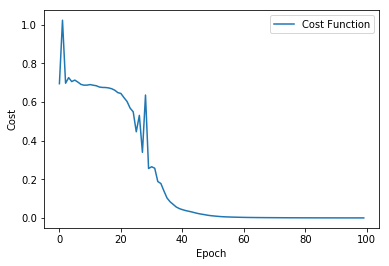

In [10]:
plt.grid("off")
plt.plot(costs,label="Cost Function")
plt.xlabel("Epoch")
plt.ylabel("Cost")
plt.legend()
plt.show()
 
sess.close()

## Task 1, Part 3 :  Build your own LSTMCell
In this part, you need to build your own LSTM cell to achieve the LSTM functionality. 

<span style="color:red">TODO:</span> 
1. Finish class **MyLSTMCell** in ecbm4040/xor/rnn.py;
2. Write the training function for your RNN;
3. Plot the cost during training.

In [11]:
print(tf.__file__)

/Users/jhuang/anaconda/lib/python3.6/site-packages/tensorflow/__init__.py


In [51]:
from ecbm4040.xor.rnn import MyLSTMCell

# recreate xor netowrk with your own LSTM cell
tf.reset_default_graph()

#Input shape: (num_samples,seq_length,input_dimension)
#Output shape: (num_samples, output_ground_truth), and output_ground_truth is 0/1. 
input_data = tf.placeholder(tf.float32,shape=[None,None,1])
output_data = tf.placeholder(tf.int64,shape=[None,None])

# recreate xor netowrk with your own LSTM cell
lstm_units = 64
cell = MyLSTMCell(lstm_units,num_proj=2)

# create LSTM network: you can also choose other modules provided by tensorflow, like static_rnn etc.
out,_ = tf.nn.dynamic_rnn(cell,input_data,dtype=tf.float32)
pred = tf.argmax(out,axis=2)

# loss function
loss = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(labels=output_data,logits=out))
# optimization
optimizer = tf.train.AdamOptimizer(learning_rate=0.1).minimize(loss)
# accuracy
correct = tf.equal(output_data,pred)
accuracy = tf.reduce_mean(tf.cast(correct,tf.float32))

### Training

In [52]:
# YOUR TRAINING AND PLOTTING CODE HERE
init_op = tf.initialize_all_variables()
sess = tf.Session()
sess.run(init_op)
costs = []

for epoch in range(100):
    inp_data,out_data = create_dataset(4096)
    _,c,acc = sess.run([optimizer,loss,accuracy],feed_dict={input_data: inp_data, output_data: out_data})
    print("Epoch: {}, Cost: {}, Accuracy: {}%".format(epoch,c,acc*100))
    costs.append(c)

Instructions for updating:
Use `tf.global_variables_initializer` instead.
Epoch: 0, Cost: 3.482042074203491, Accuracy: 49.493408203125%
Epoch: 1, Cost: 1.2660353183746338, Accuracy: 45.880126953125%
Epoch: 2, Cost: 1.1222479343414307, Accuracy: 56.3873291015625%
Epoch: 3, Cost: 0.793681263923645, Accuracy: 64.7613525390625%
Epoch: 4, Cost: 0.6406052112579346, Accuracy: 62.4053955078125%
Epoch: 5, Cost: 0.6366516351699829, Accuracy: 62.457275390625%
Epoch: 6, Cost: 0.6351776123046875, Accuracy: 68.157958984375%
Epoch: 7, Cost: 0.6116011738777161, Accuracy: 68.4783935546875%
Epoch: 8, Cost: 0.5923513174057007, Accuracy: 65.3167724609375%
Epoch: 9, Cost: 0.6044180989265442, Accuracy: 70.1416015625%
Epoch: 10, Cost: 0.6386483907699585, Accuracy: 67.51708984375%
Epoch: 11, Cost: 0.5430147647857666, Accuracy: 68.487548828125%
Epoch: 12, Cost: 0.5479917526245117, Accuracy: 73.7274169921875%
Epoch: 13, Cost: 0.5215020179748535, Accuracy: 78.2745361328125%
Epoch: 14, Cost: 0.5215981006622314, A

In [62]:
import tensorflow as tf
print (tf.__file__)

/Users/jhuang/anaconda/lib/python3.6/site-packages/tensorflow/__init__.py


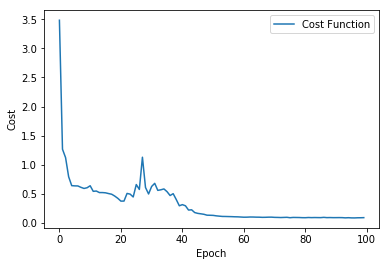

In [53]:
plt.grid("off")
plt.plot(costs,label="Cost Function")
plt.xlabel("Epoch")
plt.ylabel("Cost")
plt.legend()
plt.show()
 
sess.close()